<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1</a></span><ul class="toc-item"><li><span><a href="#-Draw-the-directed-graphical-model-" data-toc-modified-id="-Draw-the-directed-graphical-model--1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span> Draw the directed graphical model </a></span></li><li><span><a href="#-Derive-an-Expectation-Maximization-algorithm-" data-toc-modified-id="-Derive-an-Expectation-Maximization-algorithm--1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span> Derive an Expectation-Maximization algorithm </a></span></li></ul></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 2</a></span><ul class="toc-item"><li><span><a href="#Implement-the-EM-algorithm" data-toc-modified-id="Implement-the-EM-algorithm-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Implement the EM algorithm</a></span></li><li><span><a href="#Run-the-algorithm-with-$K-=-25$,-$\alpha_w-=-\alpha_h-=-1$" data-toc-modified-id="Run-the-algorithm-with-$K-=-25$,-$\alpha_w-=-\alpha_h-=-1$-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Run the algorithm with $K = 25$, $\alpha_w = \alpha_h = 1$</a></span></li><li><span><a href="#Run-the-algorithm-with-$K-=-25$,-$\beta_w-=-\beta_h-=-1$" data-toc-modified-id="Run-the-algorithm-with-$K-=-25$,-$\beta_w-=-\beta_h-=-1$-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Run the algorithm with $K = 25$, $\beta_w = \beta_h = 1$</a></span></li><li><span><a href="#Now-try-changing-the-number-of-components-K.-What-do-you-observe?" data-toc-modified-id="Now-try-changing-the-number-of-components-K.-What-do-you-observe?-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Now try changing the number of components K. What do you observe?</a></span></li></ul></li></ul></div>

In [ ]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm_notebook as tqdm

# Question 1

<div class='alert alert-info'>
    <h2> Draw the directed graphical model </h2> 
</div>

<div class='alert alert-info'>
    <h2> Derive an Expectation-Maximization algorithm </h2> 
    Derive an Expectation-Maximization algorithm for finding the maximum a-posteriori estimate (MAP), defined
as follows:
$$
(W^*, H^*) = \underset{W,H}{\operatorname{argmax}} \ln p(W,H|V),    
$$
where $V$, $W$, and $H$ are the matrices with the form: $V = [v_{fn}]_{f,n}$, $W = [w_{fk}]_{f,k}$, $H = [h_{kn}]_{k,n}$. Define auxiliary latent random variables (i.e. data augmentation) if necessary (in that case draw the new graphical model). You need to end up with some ‘multiplicative update rules’. Show all your work.
</div>

Consider the following probabilistic non-negative matrix factorization (NMF) model: (for $f = 1,\dots,F$, $n = 1,\dots,N$,$k = 1,\dots,K$)
$$
\begin{equation}
w_{fk}\sim \mathcal G(w_{fk};\alpha_w, \beta_w) \\
h_{kn}\sim \mathcal G(h_{kn};\alpha_h, \beta_h) \\
v_{fn}|w_{f,:},h_{:,n} \sim \mathcal{PO}(v_{fn};\sum_{k=1}^K w_{fk}h_{jn}) 
\end{equation}
$$
where $\mathcal G$ and $\mathcal{PO}$ denote the gamma and the Poisson distributions, respectively. Here, $w_{f,:}$ denotes the collection $\{w_{fk}\}_{k=1}^K$. We define $h_{:,n}$ similarly.

We want to seek positive matrices $W$ and $H$ such that:
$$
V \approx WH
$$
Subject to the positivity constraints, we seek a solution to the following minimisation problem:

$$
\begin{aligned}
(W^\star, H^\star) &= \underset{W,H}{\operatorname{argmax}} \ln \mathbb P(W,H|V) \\
& = \underset{W,H}{\operatorname{argmax}} \ln \mathbb P(W,H,V) - \mathbb P(V) \\
& = \underset{W,H}{\operatorname{argmax}} \ln \mathbb P(W,H,V)\\
&= \underset{W,H}{\operatorname{argmax}} \ln \mathbb P(V|W,H) + \ln(\mathbb P(W,H))\\
\end{aligned}
$$


$$
\begin{aligned}
\underset{T,V}{\operatorname{\arg max}}\ln(V\vert WH) &= \ln \prod_{f,n}\mathcal PO(v_{fn};\sum_{k=1}^K w_{fk} h_{kn}) \\
&= \underset{T,V}{\operatorname{argmax}} \sum_{fn} \left( v_{fn} \ln\left(\sum_{k=1}^K w_{fk} h_{kn}\right) - \sum_{k=1}^K w_{fk} h_{kn} - \Gamma(v_{fn}+1)\right) \\
&= \underset{T,V}{\operatorname{argmax}} \sum_{fn} \left( v_{fn} \ln\left(\sum_{k=1}^K w_{fk} h_{kn}\right) - \sum_{k=1}^K w_{fk} h_{kn})\right) \\
\end{aligned}
$$


By using the superposition property of Possion random variable, namely, when
$$s_i \sim \mathcal{PO}(s_i;\lambda_i) \:\text{ and } \: x = \sum_{k=1}^K s_k$$
then the marginal probability is given by 
$$\mathbb P(x)=\mathcal{PO}(x;\sum_{k=1}^K \lambda_{k})$$
So we define $s_i$ as auxiliary latent random variables.

So the log-likehood of the observed data $V$ can be written as
$$
\begin{aligned}
\mathcal L_V(W,H) = \ln\sum_s \mathbb P(V\vert S) \mathbb P(S\vert W,H)\mathbb P(WH)
\end{aligned}
$$
Using Jensen’s inequality, we have
$$
\begin{aligned}
\mathcal L_V(W,H) &= \ln\sum_s \mathbb P(V\vert S) \mathbb P(S\vert W,H) \\
&\ge \sum_s q(S) \ln \frac{\mathbb P(V,S\vert W,H)\mathbb P(WH)}{q(S)}
\end{aligned}
$$

Equality holds if and only if
$$
\frac{\mathbb P(V,S\vert W,H)\mathbb P(WH)}{q(S)} = c
$$
where $c$ is constant. Via imposing the normalisation condition $\sum_S q(s)= 1$, we can get 
$$
\begin{aligned}
q(s) &=  \frac{\mathbb P(V,S\vert W,H)\mathbb P(WH)}{c} \\
& = \frac{\mathbb P(V,S\vert W,H)\mathbb P(WH)}{\sum_S cq(s)} = \frac{\mathbb P(V,S\vert W,H)\mathbb P(WH)}{\sum_SP(V,S\vert W,H)P(WH)}\\
&= \frac{\mathbb P(V,S\vert W,H)\mathbb P(WH)}{\mathbb P(V\vert W,H)P(WH)} = \mathbb P(S\vert V,W,H)\\
\end{aligned}
$$



Now we will derive the EM algorithm with hidden variables $S = \{s_{fkn}\}_{f,k,n}$

$$
\begin{aligned}
\underset{V,H}{\operatorname{argmin}} \mathcal L^{t+1}_V(W,H) &=\underset{V,H}{\operatorname{argmin}} \sum_s q^t(S) \ln \mathbb P(V,S\vert W,H)\mathbb P(WH) -q^t(S)\ln q^t(S) \\
&=\underset{V,H}{\operatorname{argmin}} \sum_s q^t(S) \ln \mathbb P(V,S\vert W,H)\mathbb P(WH) \\
&=\underset{V,H}{\operatorname{argmin}} \mathbb E\left[\ln \mathbb P(V,S\vert W,H)\mathbb P(WH)\right]_{\mathbb P(S\vert V,W,H)} \\
\end{aligned}
$$

So we have:
$$
\text{E step : } \boxed{\mathcal L^{t+1}_V(\theta) = \mathbb E\left[\ln \mathbb P(V,S\vert W,H)\mathbb P(WH)\right]_{\mathbb P(S\vert V,W,H)}}
$$

We compute first:
$$
\begin{aligned}
\ln \mathbb P(V,S \vert W,H) &= \sum_{f,n}\left(\sum_k\left(s_{f,k,n}\ln(w_{f,k}h_{k,n})
- w_{f,k}h_{k,n}
-\ln\Gamma(s_{v,i,t} + 1\right) + \ln\delta\left(v_{f,n}-\sum_k s_{f,k,n}\right) \right)
\end{aligned}
$$


and
$$
\begin{aligned}
\ln \mathbb P(S\vert X, W ,H) \\
=& \ln \frac{\mathbb P(S,V \vert W ,H)}{ \mathbb P(V, W ,H)} \\
=&\sum_{f,n}\left(\sum_k\left(s_{f,k,n}\ln(w_{f,k}h_{k,n})
-w_{f,k}h_{k,n}
-\ln\Gamma(s_{v,i,t} + 1\right) + \ln\delta\left(v_{f,n}-\sum_k s_{f,k,n}\right) \right)\\  
&- \sum_{fn} \left( v_{fn} \ln\left(\sum_{k=1}^K w_{fk} h_{kn}\right) - \sum_{k=1}^K w_{fk} h_{kn}- \Gamma(v_{fn}+1)\right) 
\\
=&\sum_{f,n}\left(\sum_k\left(s_{f,k,n}\ln(w_{f,k}h_{k,n})
-w_{f,k}h_{k,n}
-\ln\Gamma(s_{v,i,t} + 1\right) + \ln\delta\left(v_{f,n}-\sum_k s_{f,k,n}\right) \right) \\ 
&- \sum_{fn}\sum_k \left( s_{f,k,n} \ln\left(\sum_{i=1}^K w_{fi} h_{in}\right) - w_{fk} h_{kn}- \Gamma(v_{fn}+1)\right) 
\\
=&\sum_{f,n}\left(\sum_k\left(s_{f,k,n}\ln \frac{w_{f,k}h_{k,n}}{\sum_{i=1}^K w_{fi} h_{in}}
-\ln\Gamma(s_{v,i,t} + 1)\right) +  \Gamma(v_{fn}+1) + \ln\delta\left(v_{f,n}-\sum_k s_{f,k,n}\right) \right) 
\\
=& \ln\sum_{f,n} \mathcal M(s_{f,1,n},\dots,s_{f,K,n}|p_{1:K,f,n}, v_{f,n}) 
\end{aligned}
$$
 where 
$$ 
p = \frac{w_{fk}h_{kn}}{\sum_k w_{f,k} h_{k,n}}
$$

According to the lecture, the exception of $s_{f,k,n}$ could be:
$$
\mathbb E[s_{f,k,n}] = v_{f_n}\frac{w_{fk}h_{kn}}{\sum_k w_{f,k} h_{k,n}}
$$

We known that $W$ and $H$ are independent, so we have:

$$
\begin {aligned}
\ln \mathbb P(W,H) = 
  & \sum_{fk}(\alpha_w -1)\ln w_{fk} + \alpha_w\ln \beta_w - \beta_w w_{fk}-\ln\Gamma(\alpha_w)\\
+ & \sum_{kn}(\alpha_h -1)\ln h_{kn} + \alpha_h\ln \beta_h - \beta_h h_{kn}-\ln\Gamma(\alpha_h)\\
\end{aligned}
$$

So the E-step will become
$$
\begin{aligned}
\mathcal L^{t+1}_V(\theta) = &\sum_{f,n}\left(\sum_k\left(\mathbb E^t[s_{f,k,n}]\ln(w_{f,k}h_{k,n})
- w_{f,k}h_{k,n}
-\ln\Gamma(s_{v,i,t} + 1\right) + \ln\delta\left(v_{f,n}-\sum_k s_{f,k,n}\right) \right) \\
& + \sum_{fk}(\alpha_w -1)\ln w_{fk} + \alpha_w\ln \beta_w - \beta_w w_{fk}-\ln\Gamma(\alpha_w)\\
& + \sum_{kn}(\alpha_h -1)\ln h_{kn} + \alpha_h\ln \beta_h - \beta_h h_{kn}-\ln\Gamma(\alpha_h)
\\
=^+ &\sum_{f,n}\left(\sum_k\left(\mathbb E^t[s_{f,k,n}]\ln(w_{f,k}h_{k,n})
- w_{f,k}h_{k,n}\right) \right) \\
& + \sum_{fk}(\alpha_w -1)\ln w_{fk} - \beta_w w_{fk}\\
& + \sum_{kn}(\alpha_h -1)\ln h_{kn} - \beta_h h_{kn}\\
\end{aligned}
$$


Now we have
$$
W^{t+1}, T^{t+1} = \underset{W,H}{\operatorname{argmin}} \mathcal  L^{t+1}_V(\theta)
$$

Maximisation of the objective$\mathcal L_V(\theta)$ give the following fixed point equations:
$$
\begin{aligned}
\frac {\partial L^{t+1}_V(\theta)}{\partial w_{fk}} & = -\sum_n h_{k,n}^{(t)} + \frac{\sum_n \mathbb E^{(t)}(s_{f,k,n})}{w_{fk}^{(t)}}  +  \frac{\alpha_w-1}{w_{fk}^{(t)}} - \beta_w= 0
\\
w_{fk}^{(t+1)} & = \frac{\alpha_w-1 +\sum_n \mathbb E^{(t)}(s_{f,k,n})}{\beta_w +\sum_n h_{k,n}^{(t)}} 
= \frac{\alpha_w-1 +\ w_{fk}^{(t)}\sum_n v_{fn} \; h^{(t)}_{kn}\big/{\sum_k w^{(t)}_{fk}h^{(t)}_{kn}}}{\beta_w +\sum_n h_{k,n}^{(t)} }
\\
\frac {\partial L^{t+1}_V(\theta)}{\partial h_{kn}} & = -\sum_f w_{f,k}^{(t)} + \frac{\sum_f \mathbb E^{(t)}(s_{f,k,n})}{h_{k,n}^{(t)}}  +  \frac{\alpha_h-1}{w_{k,n}^{(t)}}-\beta_h = 0
\\
h^{t+1}_{kn} & = \frac{\alpha_h-1 +\sum_f \mathbb E^{(t)}(s_{f,k,n})}{\beta_h +\sum_f w_{f,k}^{(t)} } 
 = \frac{\alpha_h-1 +\ h_{kn}^{(t)}  \sum_f v_{fn} \; w^{(t)}_{fk}\big/{\sum_k w^{(t)}_{fk}h^{(t)}_{kn}}}{\beta_h +\sum_f w_{f,k}^{(t)} } \\
\\
\end{aligned}
$$

# Question 2

<div class='alert alert-info'>
In this part, our aim will be to analyze a dataset of face images. We will use the AT&T Database of Faces [1]. This dataset contains face images from 40 distinct subjects, where there are 10 images for each subject. In total there are 400 images in the dataset, where the size of each image is 92 x 112 pixels, with 256 gray levels per pixel. A preview
image of the dataset is given in Figure 1.<br>
    
In this experiment, we will ‘vectorize’ all the images in the dataset and concatenate these vectors in order to represent the whole dataset as a matrix. Finally, we obtain an observed matrix V of dimensions F = 92 × 112 and
N = 400. We provide the matrix V obtained from the dataset in the file "attfaces.mat"1.<br>

The goal of the experiment is to obtain a ‘parts-based-representation’ of faces by learning an NMF model on this dataset. Our hope is that, when we estimate the matrices W and H by using V , the columns of W will correspond to some images that only contain a particular part of a face (remember that each column of W is a vector of size F = 92 × 112. Therefore you can reshape this vector to obtain an image (matrix) of size 92 × 112.)
</div>

In [180]:
from scipy import stats
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tnrange,tqdm_notebook,tqdm

In [287]:
type(W) == torch.Tensor

True

In [ ]:
def show_image(V_init,n_rows, n_cols, im_h=112,im_w=92 ):
    '''
    V : The image you want to show
    '''

    V = V_init.copy()
        
    cmap = 'gray_r' if inverse else 'gray'
    new_W = np.apply_along_axis(lambda x: x.reshape(im_w,im_h).T,axis=0,arr=V )
    image = np.zeros((im_h*n_rows,im_w*n_cols))
    for i in range(n_rows):
        for j in range(n_cols):
            image[i*im_h:(i+1)*im_h, j*im_w:(j+1)*im_w] = new_W[:,:,i*n_rows+j]
    
    ax.imshow(image, cmap=cmap)

In [444]:
def show_image(V_init,n_rows, n_cols, im_h=112,im_w=92, ax=None, adjust = False, inverse = False,title=None ):
    '''
    V : The image you want to show
    '''
    
    if type(V_init) == torch.Tensor:
        V_init = V_init.data.cpu().numpy()
    V = V_init.copy()
    
    if adjust:
        V_max = np.max(V, axis=0)
        V_min = np.min(V, axis=0)
        V = (V - V_min) / (V_max-V_min) * 256
        
        
    cmap = 'gray_r' if inverse else 'gray'
    new_W = np.apply_along_axis(lambda x: x.reshape(im_w,im_h).T,axis=0,arr=V )
    print(new_W.shape)
    image = np.zeros((im_h*n_rows,im_w*n_cols))
    for i in range(n_rows):
        for j in range(n_cols):
            image[i*im_h:(i+1)*im_h, j*im_w:(j+1)*im_w] = new_W[:,:,i*n_rows+j]
    if ax == None:
        plt.figure(figsize=(15,20))
        ax = plt.gca()
    ax.imshow(image, cmap=cmap)
    ax.axis('off')
    ax.set_title(title)

In [445]:
n_iter = 10000

(112, 92, 400)


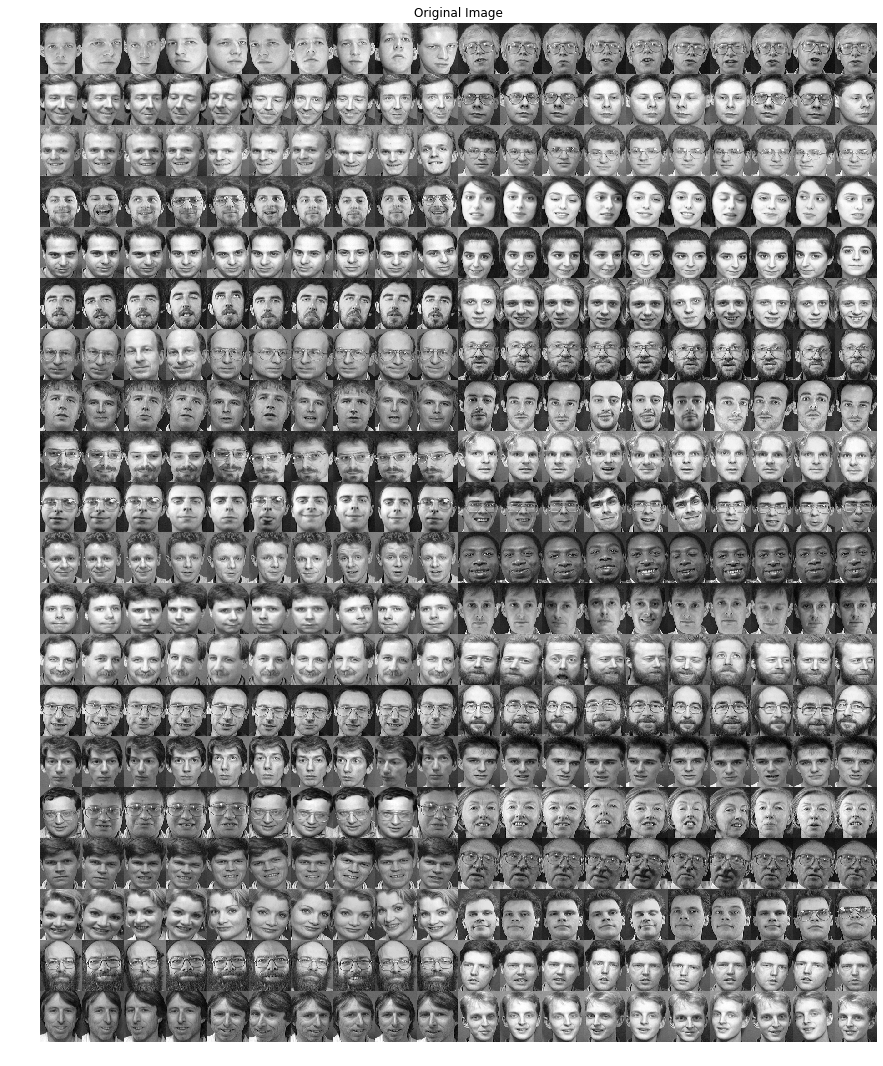

In [446]:
V = loadmat('attfaces.mat')['V']
show_image(V, 20,20, title='Original Image', adjust=True)

## Implement the EM algorithm

In [295]:
def init_w_h(F, N, K,a_w=1,b_w=1,a_h=1,b_h=1):
    '''
    initialize W and H.
    '''
    W = stats.gamma.rvs(a_w, scale = 1/b_w, size=(F,K))
    H = stats.gamma.rvs(a_h, scale = 1/b_h, size=(K,N))
    return W,H

In [296]:
import torch

In [303]:
def em_step(V,
            K,
            a_w,
            b_w,
            a_h,
            b_h,
            n_iter=100,
            tol=1e-6):

    like_hoods = np.zeros(n_iter)
    diffs = []
    old_likehood = 0
    
    
    F, N = V.shape
    W, H = init_w_h(F, N, K, a_w, b_w, a_h, b_h)
    device = torch.device("cuda")
    W = torch.from_numpy(W).double().to(device)
    H = torch.from_numpy(H).double().to(device)
    V = torch.from_numpy(V).double().to(device)
    
    iterator = tnrange(n_iter)
    for i in iterator:
        WH = W.mm(H)
        W_num = (a_w - 1.0) + W * ((V / WH).mm(H.t()))
        W_div = b_w + H.sum(dim=1).repeat(F,1)
        _W = W_num / W_div
        W = _W
        
        H_num = a_h - 1.0 + H * (torch.mm(W.t(), V / W.mm(H)))
        H_div = b_h + W.sum(dim=0).repeat(N,1).t()
        _H = H_num / H_div
        
        W = _W
        H = _H

        diff = ( V-W.mm(H)).norm()
        if(i>1):
            _tol = torch.abs((diff - diffs[i-1])/diffs[i-1])
            if(_tol < tol):

                iterator.update(n_iter-iterator.n)
                iterator.refresh()
                iterator.set_postfix_str('|V-WH| small than tol')
                break
            
        diffs.append(diff)
        
    
    return W.data.cpu().numpy(),H.cpu().numpy(), diffs    
        
        

In [306]:
torch.set_default_tensor_type('torch.cuda.FloatTensor')
a_w, a_h=1,1
K = 25
V = loadmat('attfaces.mat')['V']
W,H,diffs =em_step(V.copy(),25, 1, 1, 1, 1, n_iter=1000)

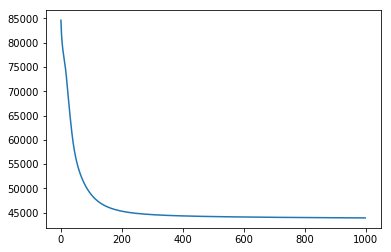

In [326]:
plt.plot(diffs)

## Run the algorithm with $K = 25$, $\alpha_w = \alpha_h = 1$
<div class='alert alert-info'>
Set $K = 25$, $\alpha_w = \alpha_h  = 1$. Try different values for $\beta_w$ and $\beta_h$. Visualize
the columns of estimated W matrices. What do you observe when you change the parameters?
</div>

In [401]:
(F,N) = V.shape
a_w, a_h=1,1
K = 25
Ws, Hs, diffs = [], [], []

for i in tnrange(4,leave = True):
    V = loadmat('attfaces.mat')['V']
    b_w,b_h=i+1,i+1
    W,H,diff =em_step(V.copy(),K, a_w, b_w, a_h, b_h, n_iter=1000)
    Ws.append(W)
    Hs.append(H)
    diffs.append(diff)

In [412]:
W.dot(H)[:, 0::10].shape

(10304, 40)

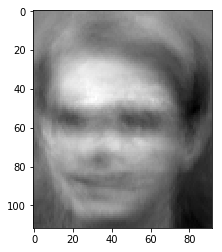

In [424]:
plt.imshow(W.dot(H)[:,399].reshape(92,112).T, cmap='gray')

In [434]:
W.dot(H)[:,200:400:10].shape

(10304, 20)

(112, 92, 40)


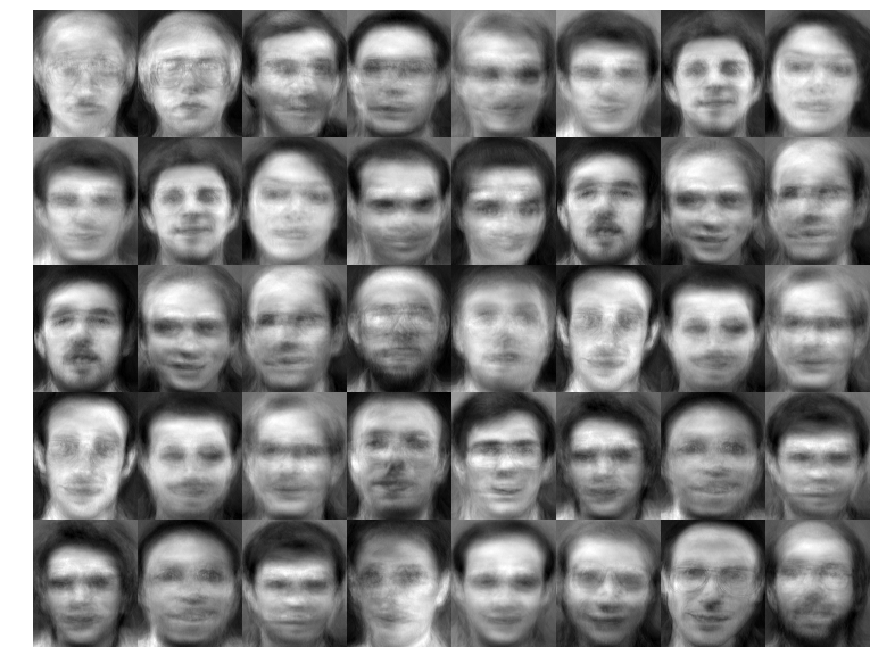

In [449]:
show_image(W.dot(H)[:,2::10],5,8, adjust=True)

(112, 92, 25)
(112, 92, 40)
(112, 92, 25)
(112, 92, 40)
(112, 92, 25)
(112, 92, 40)
(112, 92, 25)
(112, 92, 40)


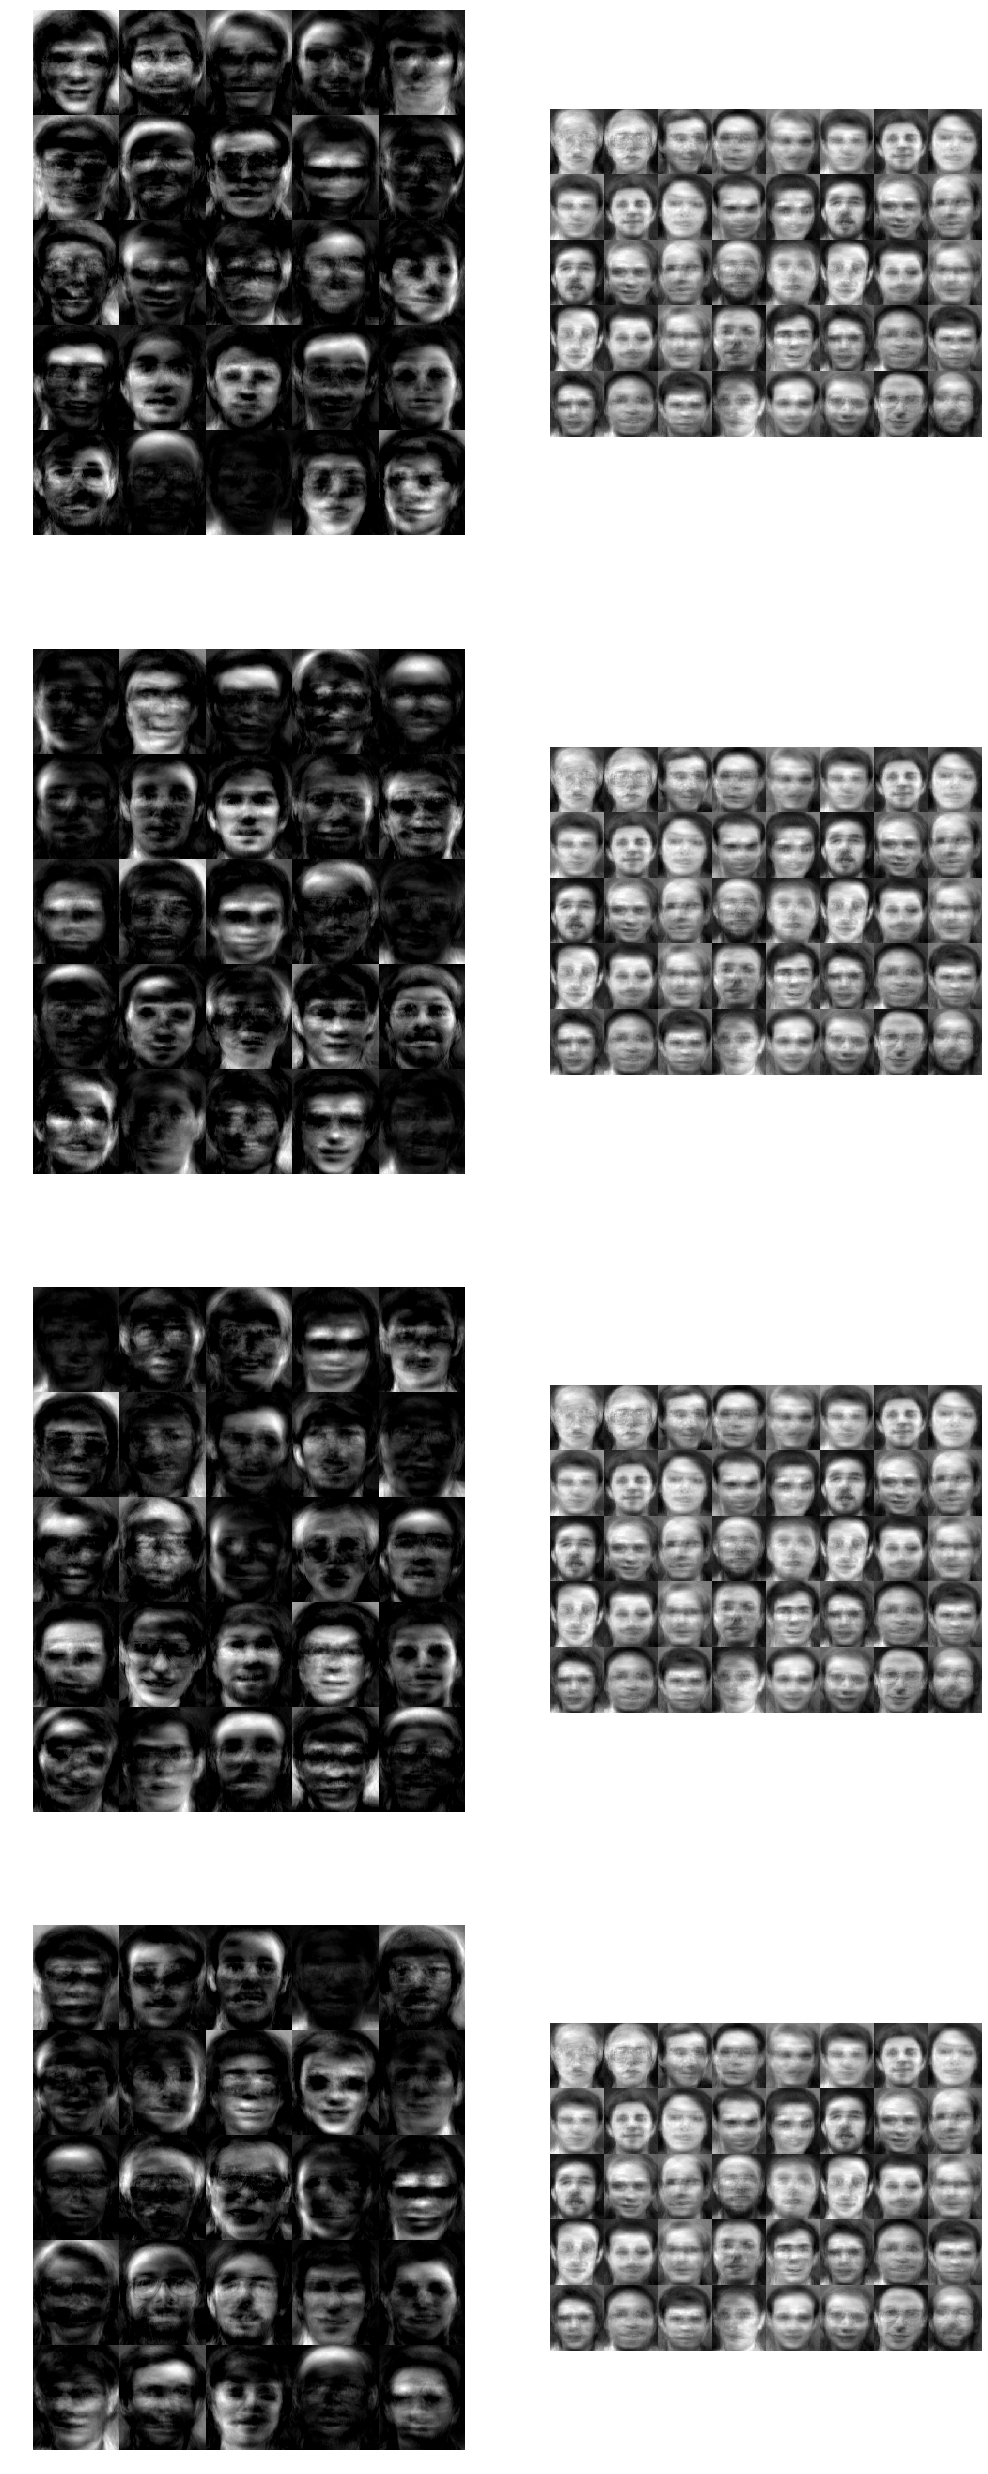

In [452]:
V = loadmat('attfaces.mat')['V']
_,axs = plt.subplots(4,2, figsize=(17,45))
for i in range(4):
    show_image(Ws[i],5,5,ax= axs[i][0],adjust=True)
    show_image(W.dot(H)[:,2::10],5,8, ax=axs[i][1], adjust=True)
    axs[i][1].axis('off')
    

## Run the algorithm with $K = 25$, $\beta_w = \beta_h = 1$

<div class='alert alert-info'>
Run the algorithm with K = 25, βw = βh = 1. Try different values for αw and αh. Visualize the columns of
estimated W matrices. What do you observe when you change the parameters?
</div>

In [376]:
(F,N) = V.shape
b_w, b_h=1,1
K = 25
Ws, Hs, diffs = [], [], []
V = loadmat('attfaces.mat')['V']

for i in tnrange(4, leave = True):
    a_w,a_h=i+1,i+1
    W,H,diff =em_step(V.copy(),K, a_w, b_w, a_h, b_h,n_iter=300)
    Ws.append(W)
    Hs.append(H)
    diffs.append(diff)

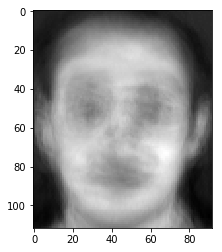

In [393]:
plt.imshow(W.dot(H)[:,0].reshape(92,112).T, cmap='gray')

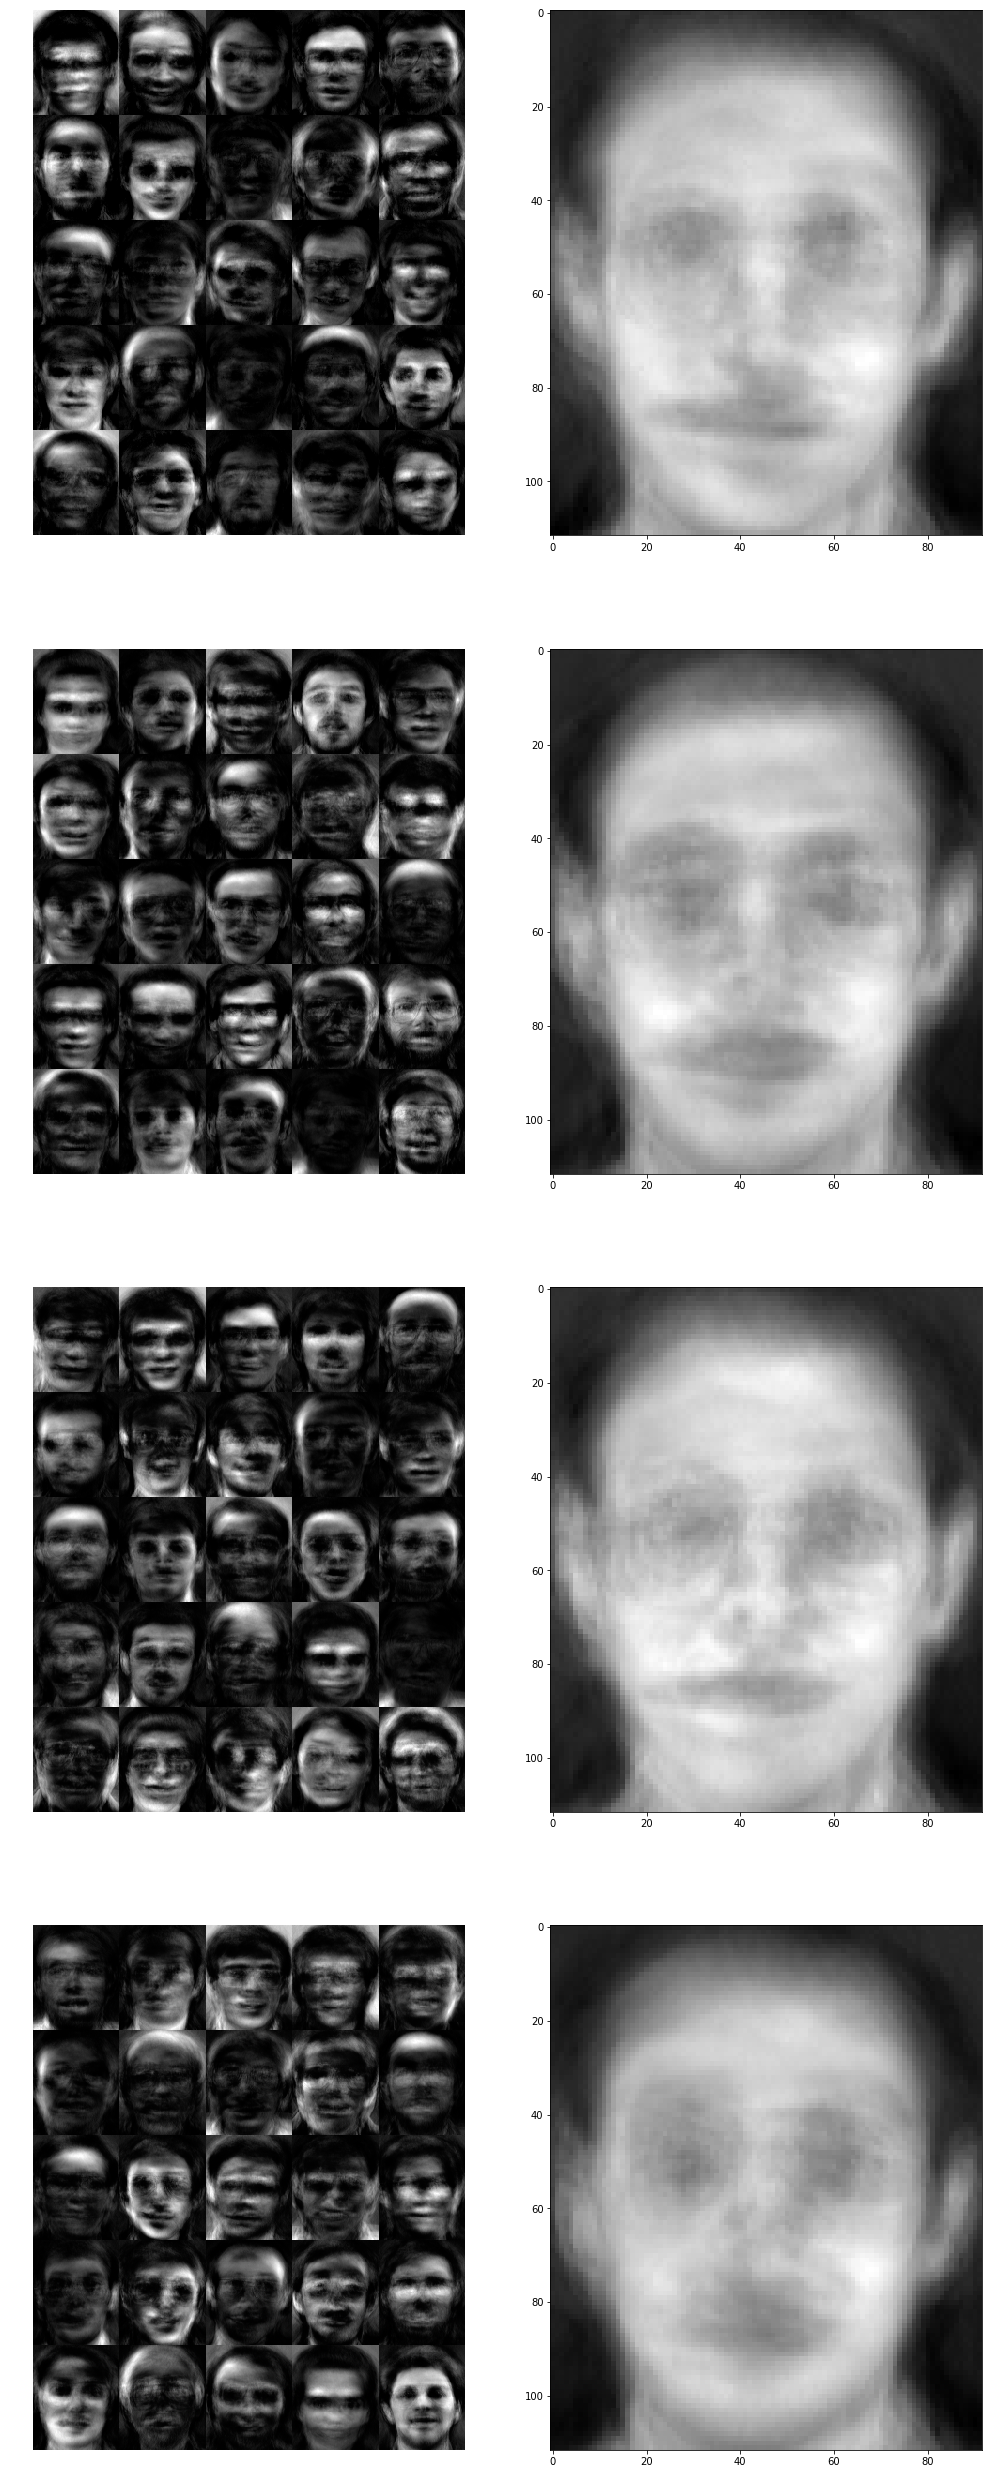

In [395]:
_,axs = plt.subplots(4,2, figsize=(17,45))
for i in range(4):
    show_image(Ws[i],5,5,ax= axs[i][0],adjust=True)
    axs[i][1].imshow(Ws[i].dot(Hs[i])[:,0].reshape(92,112).T, cmap='gray')

## Now try changing the number of components K. What do you observe?

In [347]:
(F,N) = V.shape

Ws, Hs, diffs = [], [], []

for i in tnrange(4, leave = False):
    K=(i+4)**2
    W,H = init_w_h(F,N,K, a_w, b_w, a_h, b_h)
    W,H,diff =em_step(V,K,a_w, b_w, a_h, b_h, n_iter=n_iter)
    Ws.append(W)
    Hs.append(H)
    diffs.append(diff)

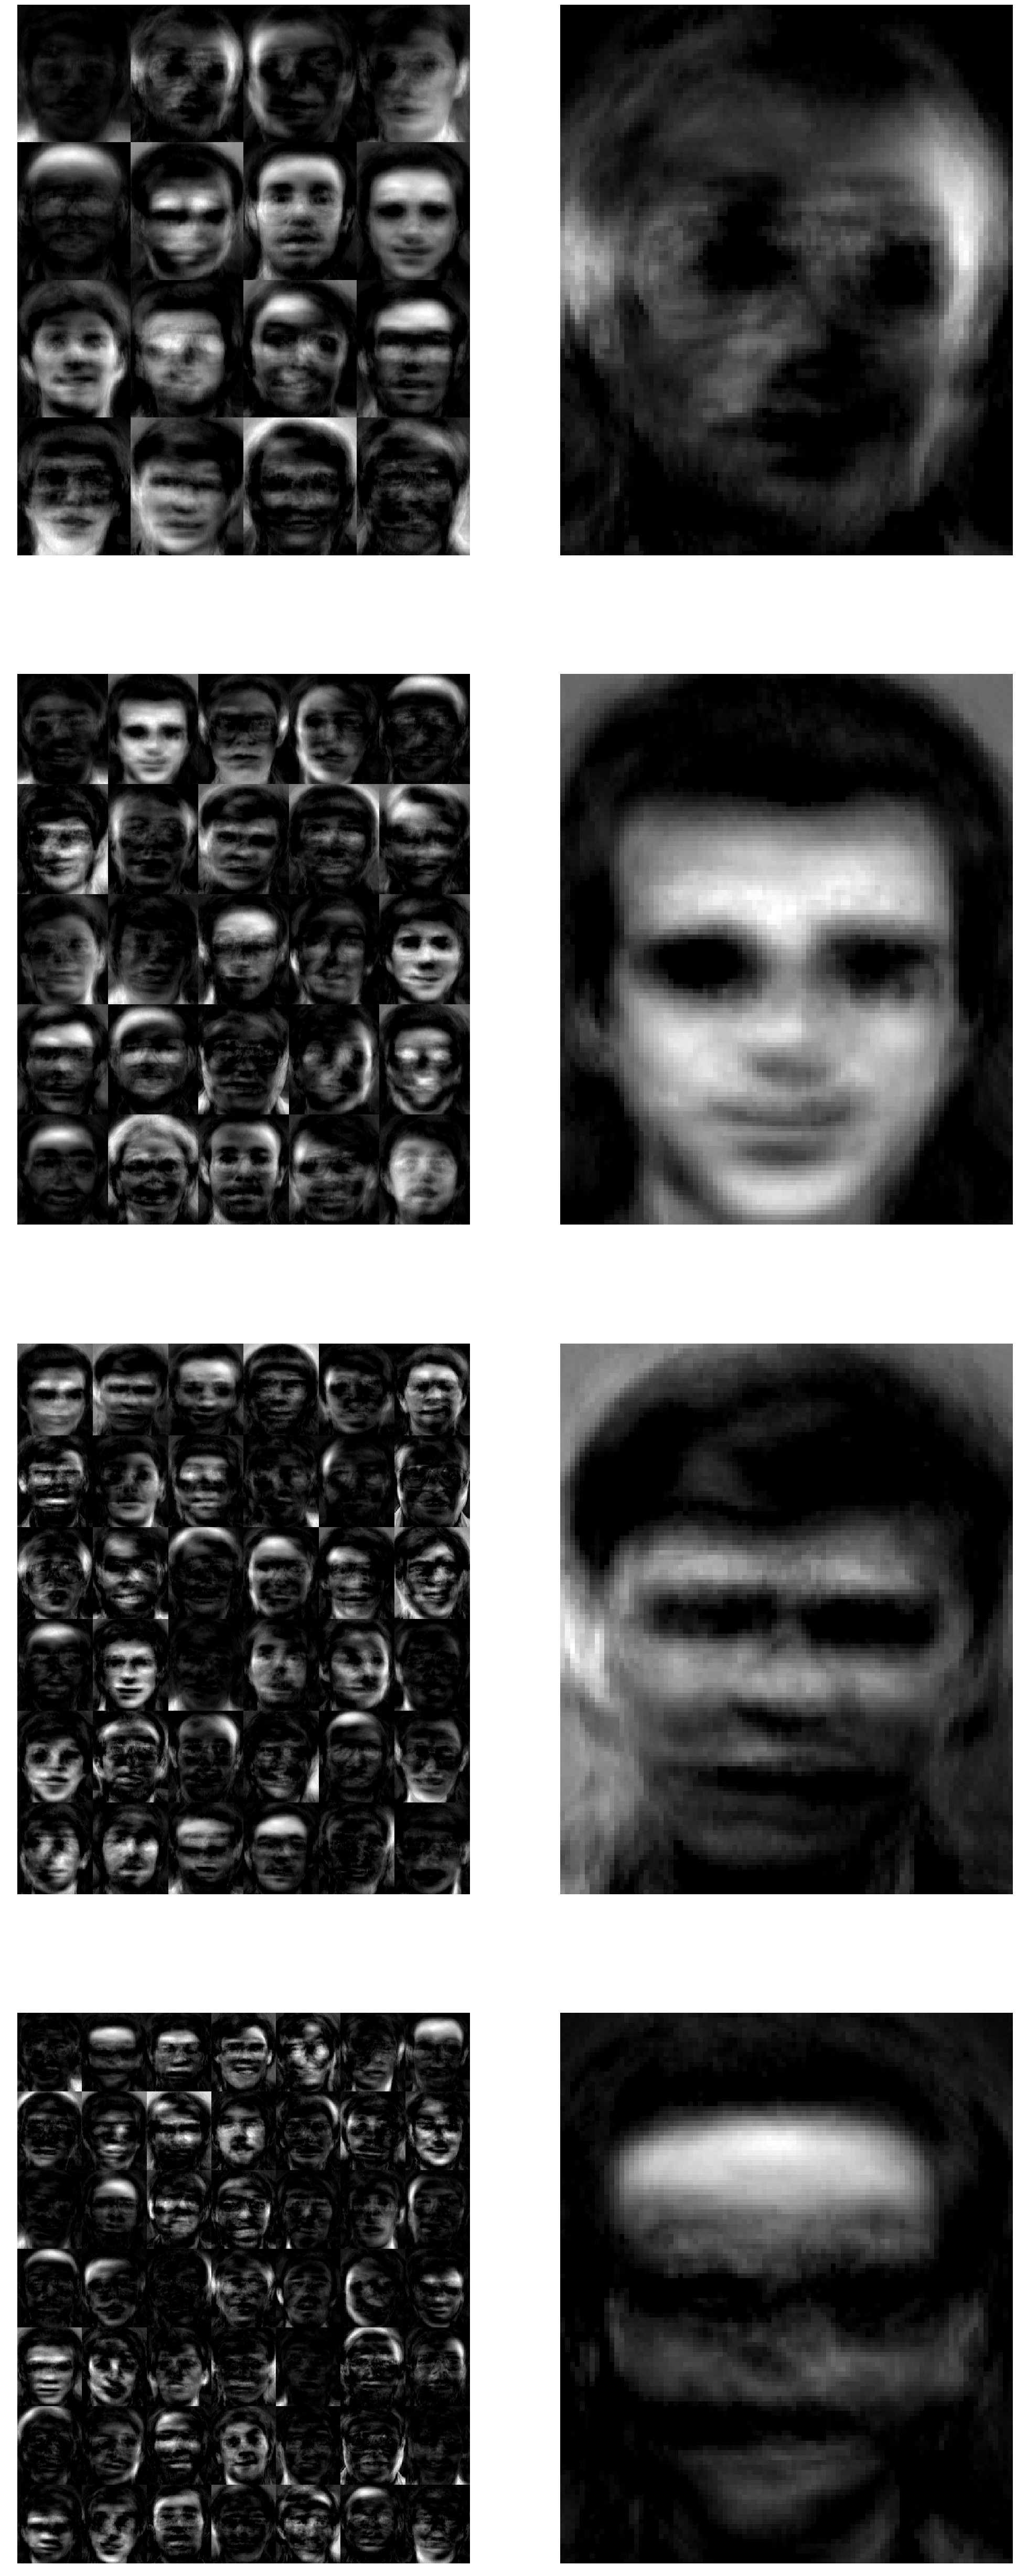

In [375]:
_,axs = plt.subplots(4,2, figsize=(34,90))
for i in range(4):
    K = Ws[i].shape[1]
    nw = int(np.sqrt(K))
    show_image(Ws[i],nw,nw,ax= axs[i][0], adjust=True)
    X = np.multiply(np.array([Ws[i][:,1]]).T, Hs[i][:,1])
    axs[i][1].imshow(X.sum(axis=1).reshape(92,112).T, cmap='gray')
    axs[i][1].axis('off')

    
#     print(i, X.shape, nw,K)
#     show_image(X,nw,nw,ax= axs[1][i] )
    

In [356]:
show_image(X,400,400)

MemoryError: 